## Importing

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
import lazypredict
%matplotlib inline 

# ML models
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras import callbacks
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Model for Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

### Load Data
This [dataset](https://www.kaggle.com/datasets/prishasawhney/email-classification-ham-spam/data) contains textual description of the **emails/ messages** coupled with `label` classifing them as spam or not

In [2]:
df = pd.read_csv("email_classification.csv")
df.shape

(179, 2)

In [3]:
# Change the labels to integers
df['label']=df['label'].map({'spam':1,'ham':0})

In [4]:
# Checking for na
df.isnull().sum()

email    0
label    0
dtype: int64

In [5]:
df.head()

,email,label
0,Upgrade to our premium plan for exclusive acce...,0
1,Happy holidays from our team! Wishing you joy ...,0
2,We're hiring! Check out our career opportuniti...,0
3,Your Amazon account has been locked. Click her...,1
4,Your opinion matters! Take our survey and help...,0


### Class Balance

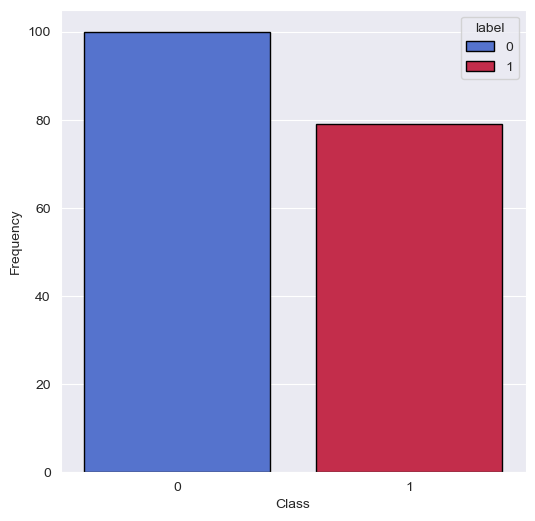

In [6]:
#Choose a style for the plot
sns.set_style("darkgrid")

plt.subplots(figsize=(6, 6))
sns.countplot(x='label', data=df, hue='label', palette = ["royalblue","crimson"], edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Frequency');

## Machine Learning

In [7]:
## Create a function to evaluate the models
def evaluate_preds(y_true, y_preds):
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [8]:
## Create a function to do Cross-Validation
def cross_validation(model, X, y):
    
    accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=10, scoring='precision').mean()
    recall = cross_val_score(model, X, y, cv=10, scoring='recall').mean()
    f1 = cross_val_score(model, X, y, cv=10, scoring='f1').mean()
    
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [9]:
# transform the data into a matrix so we can do machine learning on it
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['email'])

encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])

### Comparing Different Models
We will compare different **Ml models** using `Cross-Validation` to see which one performs the best

In [10]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Extra-Trees": ExtraTreesClassifier(),
    "Decision Tree": DecisionTreeClassifier()}

# Setup random seed
np.random.seed(50)

# Split data into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Iterate over each classifier using cross validation
for name, model in models.items():
            # Setup random seed
            np.random.seed(50)
    
            # Print evaluation metrics
            print(f"\nClassifier: {name}")
            cross_validation(model, X, y)


Classifier: Logistic Regression
Accuracy: 94.31%
Precision: 1.00
Recall: 0.87
F1 score: 0.92

Classifier: Random Forest
Accuracy: 97.68%
Precision: 0.99
Recall: 0.96
F1 score: 0.97

Classifier: K-Nearest Neighbors
Accuracy: 88.76%
Precision: 0.86
Recall: 0.93
F1 score: 0.88

Classifier: Extra-Trees
Accuracy: 98.24%
Precision: 1.00
Recall: 0.96
F1 score: 0.97

Classifier: Decision Tree
Accuracy: 96.57%
Precision: 0.98
Recall: 0.94
F1 score: 0.95


In [11]:
# Initialising the NN
model = Sequential()

# layers
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Compiling the NN
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Setup random seed
np.random.seed(50)

# Train the NN
history = model.fit(X_train, y_train, epochs = 35, validation_split=0.2)

Epoch 1/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.5268 - loss: 0.2508 - val_accuracy: 0.6207 - val_loss: 0.2500
Epoch 2/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6513 - loss: 0.2478 - val_accuracy: 0.5862 - val_loss: 0.2489
Epoch 3/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6553 - loss: 0.2461 - val_accuracy: 0.5862 - val_loss: 0.2477
Epoch 4/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7772 - loss: 0.2432 - val_accuracy: 0.6552 - val_loss: 0.2465
Epoch 5/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7982 - loss: 0.2406 - val_accuracy: 0.6552 - val_loss: 0.2452
Epoch 6/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8469 - loss: 0.2366 - val_accuracy: 0.5862 - val_loss: 0.2438
Epoch 7/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8191 - loss: 0.2344 - val_accuracy: 0.5862 - val_loss: 0.2420
Epoch 8/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8383 - loss: 0.2295 - val_accuracy: 0.5862 - val_loss: 0.2400


In [13]:
def training_history(model):
    train_loss = model.history['loss']
    train_acc = model.history['accuracy']
    val_loss = model.history['val_loss']
    val_acc = model.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    #Choose a style for the plot
    plt.style.use("default")

    # Create a figure and axes with 1 row and 2 columns
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

    ax[0].plot(epochs, train_loss, 'y', label='Training loss')
    ax[0].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[0].set_title('Training and validation loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend();

    ax[1].plot(epochs, train_acc, 'y', label='Training acc')
    ax[1].plot(epochs, val_acc, 'r', label='Validation acc')
    ax[1].set_title('Training and validation accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend();

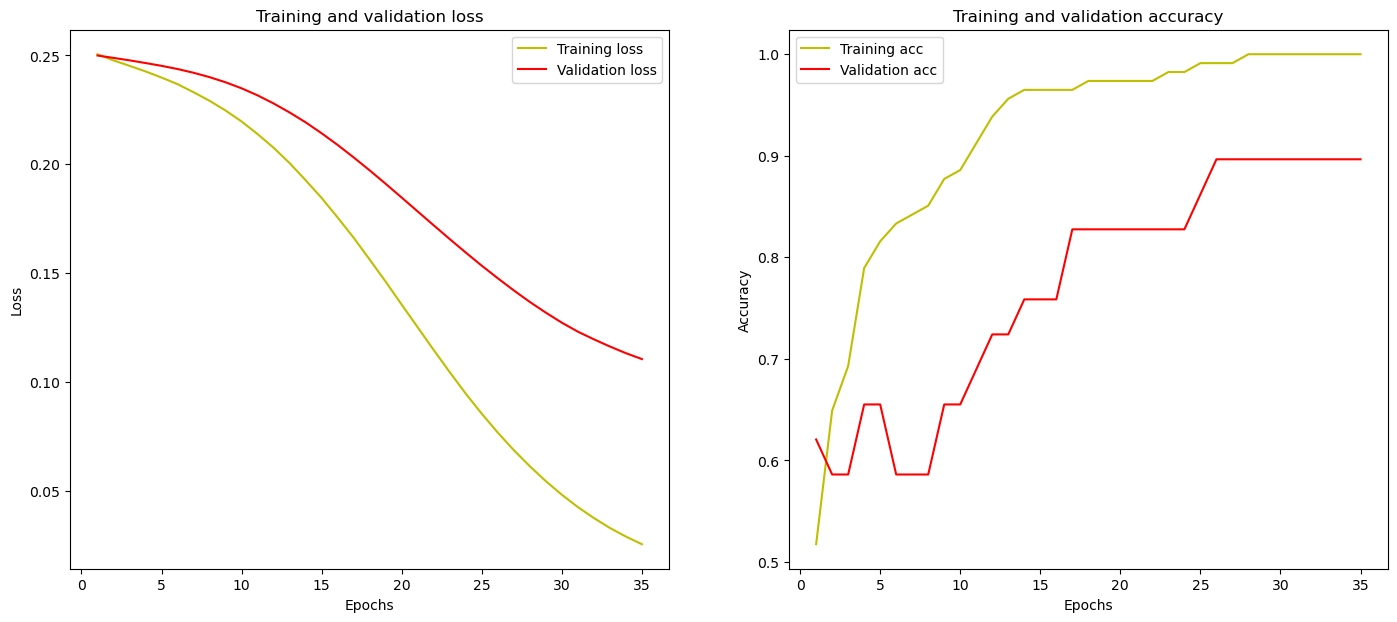

In [14]:
training_history(history)

In [15]:
# Predicting the test set results
y_preds = model.predict(X_test)

evaluate_preds(y_test, np.round(y_preds,0));

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Accuracy: 91.67%
Precision: 0.84
Recall: 1.00
F1 score: 0.91


In [16]:
extra_tree = ExtraTreesClassifier()
extra_tree.fit(X_train, y_train)

y_preds = extra_tree.predict(X_test)
evaluate_preds(y_test, y_preds);

Accuracy: 97.22%
Precision: 0.94
Recall: 1.00
F1 score: 0.97


### Hyperparameter tuning with RandomizedSearchCV

In [17]:
# Create a hyperparameter grid for ExtraTreesClassifier
etc_grid = {'n_estimators': [100,200,300,400,500],
        'bootstrap':[True, False],
        'max_features': ['sqrt','log2',None],
        'max_depth':[2,4,6,8,None]}

# Setup random seed
np.random.seed(50)

# Setup random hyperparameter search for ExtraTreesClassifier
rs_etc = RandomizedSearchCV(ExtraTreesClassifier(),
                           param_distributions=etc_grid,
                           cv=5,
                           n_iter=26,
                           verbose=True,
                           n_jobs=-1)

# Fit random hyperparameter search model
rs_etc.fit(X_train, y_train);

Fitting 5 folds for each of 26 candidates, totalling 130 fits


In [18]:
y_preds = rs_etc.predict(X_test)
evaluate_preds(y_test,y_preds);

Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


### Confusion Matrix

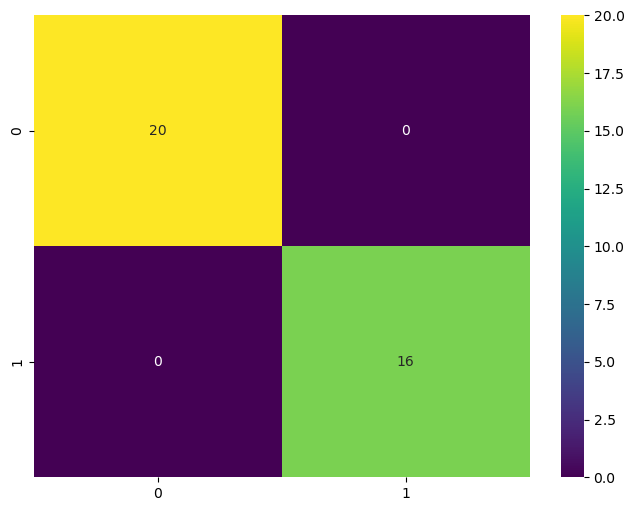

In [19]:
# Making a Confusion Matrix
y_preds = rs_etc.predict(X_test)

ConfusionMatrix = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(ConfusionMatrix, cmap="viridis", annot=True);

### ROC curve

In [20]:
# Create a function for plotting ROC curves
def plot_roc_curve(fpr, tpr):
    # Plot roc curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_probs_positive), color='blue')
    plt.plot([0, 1], [0, 1], color="red", linestyle="--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

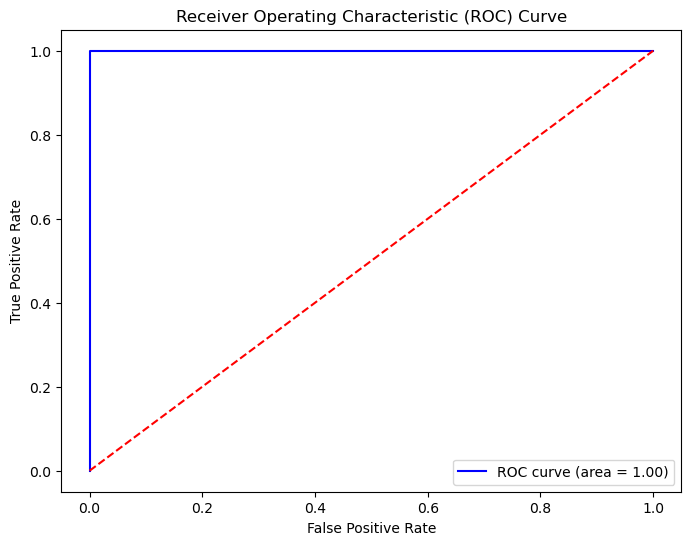

In [21]:
#Choose a style for the plot
plt.style.use("default")

# Make predictions with probabilities
y_probs = rs_etc.predict_proba(X_test)

# Caculate fpr, tpr and thresholds
y_probs_positive = y_probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
    
plot_roc_curve(fpr, tpr)

## Testing on New Data

In [22]:
# Create a function for classifying messages
def message_classifier(model, mes):
    test = vectorizer.transform([mes])
    y_preds = model.predict(test)

    if y_preds[0] == 1:
        print("This message is spam")
    else:
        print("This message is not a spam")

In [23]:
mes = "Congratulations you have won a free holiday. Click here to claim your reward!"
message_classifier(rs_etc, mes)

This message is spam
